Kvalita cementu

V souboru Concrete_Data_Yeh.csv najdeš informace o kvalitě cementu.

Sloupce 1-7 udávají množství jednotlivých složek v kg, které byly přimíchány do krychlového metru betonu
(např. cement, voda, kamenivo, písek atd.). 
Ve sloupci 8 je stáří betonu a ve sloupci 9 kompresní síla betonu v megapascalech.

Vytvoř regresní model, který bude predikovat kompresní sílu betonu na základě všech množství jednotlivých složek a jeho stáří.

Zhodnoť kvalitu modelu.

Tipni si, která ze složek betonu ovlivňuje sílu betonu negativní (tj. má záporný regresní koeficient).
Napiš, o kterou složku jde, do komentáře svého programu.

In [1]:
import requests
import pandas as pd
import seaborn
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix

r = requests.get("https://raw.githubusercontent.com/pesikj/progr2-python/master/data/Concrete_Data_Yeh.csv")
with open("Concrete_Data_Yeh.csv", "wb") as f:
  f.write(r.content)

In [11]:
cement = pd.read_csv("Concrete_Data_Yeh.csv")
cement

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


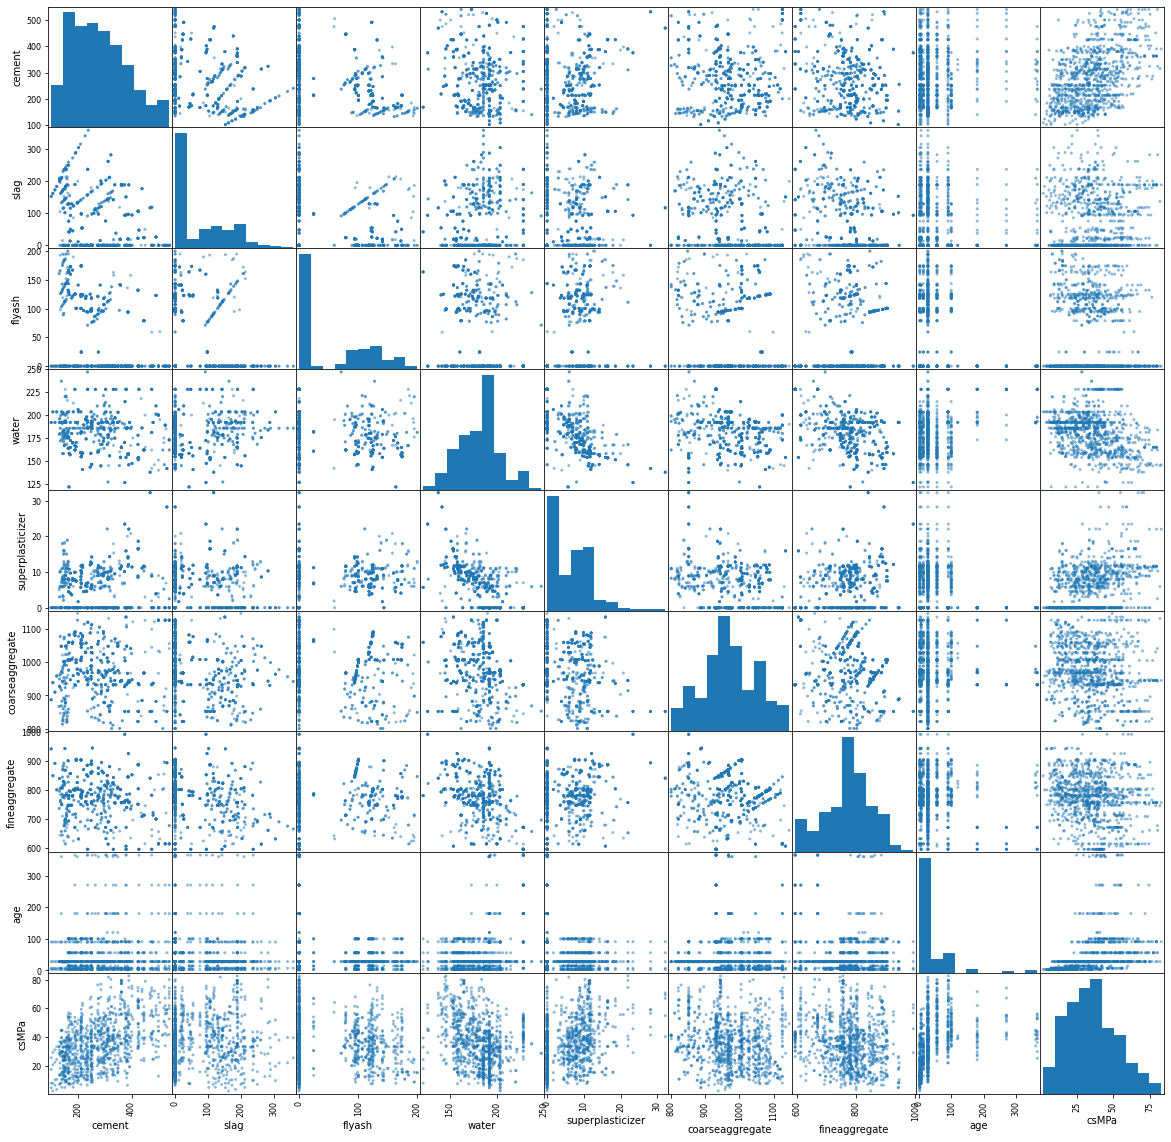

In [3]:
scatter_matrix(cement, figsize=(20,20)); 

# asi nepojde uplne o linearnu zavislost 

<AxesSubplot:>

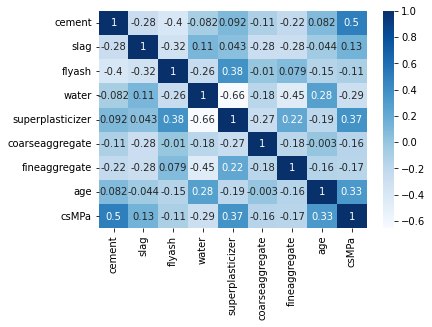

In [4]:
seaborn.heatmap(cement.corr(),annot = True, cmap= "Blues")

# myslim si, ze tvrdost betonu je priamo ovplivnena najviac zlozkou cement, superplasticizer a vekom
# cim je v betone viac cementu,tym je tvrdsi - priama zavislost
# ostatne zlozky nepriamo ovplivnuju tvrdost betonu, napr. cim viac vody beton obsahuje, tym klesa tvrdost betonu

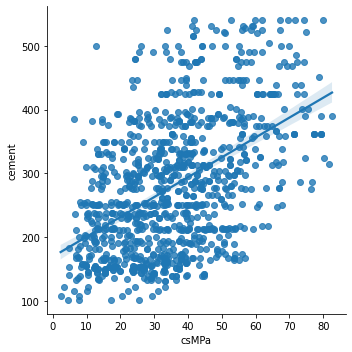

In [5]:
seaborn.lmplot(x="csMPa",y= "cement", data= cement)

In [6]:
model_csMPa_cement = smf.ols(formula = "csMPa ~ cement", data= cement)

In [7]:
result_cement= model_csMPa_cement.fit() 
result_cement.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     338.7
Date:                Sat, 11 Dec 2021   Prob (F-statistic):           1.32e-65
Time:                        10:02:44   Log-Likelihood:                -4214.6
No. Observations:                1030   AIC:                             8433.
Df Residuals:                    1028   BIC:                             8443.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4425      1.297     10.365      0.000      10.898      15.987
cement         0.0796      0.004     18.404      0.000       0.071       0.088
==============================================================================
Omnibus:                       19.696   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.893
Skew:                           0.271   Prob(JB):                     0.000130
Kurtosis:                       2.649   Cond. No.                         861.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
result_cement.predict(cement)

0       56.415909
1       56.415909
2       39.902990
3       39.902990
4       29.247183
          ...    
1025    35.438533
1026    39.083312
1027    25.260208
1028    26.103760
1029    34.205038
Length: 1030, dtype: float64

In [9]:
model_csMPa = smf.ols(formula = "csMPa ~ cement + age + superplasticizer + water+slag+flyash + coarseaggregate + fineaggregate", data= cement)
result = model_csMPa.fit()
result.summary() 
# model je uz presnejsi ako prvy model, kde koeficient determinacie je 0,248

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          6.29e-206
Time:                        10:02:44   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -23.3312     26.586     -0.878      0.380     -75.500      28.837
cement               0.1198      0.008     14.113      0.000       0.103       0.136
age                  0.1142      0.005     21.046      0.000       0.104       0.125
superplasticizer     0.2922      0.093      3.128      0.002       0.109       0.476
water               -0.1499      0.040     -3.731      0.000      -0.229      -0.071
slag                 0.1039      0.010     10.247      0.000       0.084       0.124
flyash               0.0879      0.013      6.988      0.000       0.063       0.113
coarseaggregate      0.0181      0.009      1.926      0.054      -0.000       0.037
fineaggregate        0.0202      0.011      1.887      0.059      -0.001       0.041
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
nove_parametre = pd.DataFrame({"cement":[418], "age":[35],"superplasticizer":[7.2],"water":[160],"slag":[120],"flyash":[90],"coarseaggregate":[970],"fineaggregate":[720]})

In [13]:
result.predict(nove_parametre)

0    61.320508
dtype: float64

In [14]:
# asi dost tvrdy beton sa namiesal :-)